<center> <h1>Unit 6</h1> </center>
<center> <h1>Assessing model accuracy</h1> </center>
<center> <h4>(Notebook: regression_model_comparison.ipynb) </h4></center>
<br>
<br>
<br>
<center> <h3>IST 718 – Big Data Analytics</h3> </center>
<center> <h3>Daniel E. Acuna</h3> </center>
<center> <h3>http://acuna.io</h3> </center>


# From previous unit
- We took a **statistical approach to learning** which acknowledges our uncertainty and noise in the data science process.  

- We defined a **model** of the data.  

- We estimated the parameters using **training data**.  

- We used the model to **predict** and **interpret** the results.  

- We could use **supervised** or **unsupervised** learning to find relationships between variables.  

- If variables are not quantitative, we used classification models.

# In this unit
- Generalization performance
- Estimating generalization performance: cross-validation
- Bias-variance decomposition
- Performance of classifiers: confusion matrix, ROC curve, AUC
- Bayes rule

<center><img src="./images/unit-06/unit-06-0_ama1.png" width="100%" align="center"></center>

<center><img src="./images/unit-06/unit-06-0_ama2.png" width="100%" align="center"></center>

# Generalization performance
- Generalization is the performance of a learning method on independent **test data**.  

- Generalization performance guides the choice of learning method or model.  
- **Why don't we teach the *best method*?**
  - *Because there is no free lunch in statistics*: David Wolpert, "The Lack of A Priori Distinctions Between Learning Algorithms", 1996.
  <div class="blockquote2">
    No one method dominates all others over all possible data sets.
  </div>

# Generalization performance (2)
- The no free lunch theorem implies that we need to:  

  1. Learn about the **particular dataset** we are working on (data science!)  
  
  2. **Select the best method** using generalization performance (data science!)


# Measuring generalization performance: theory
- We need to define a loss function:

$$l(Y,\hat{f}(X))$$  

- For example, the Squared Error for regression:

$$l(Y,\hat{f}(X)) = (Y - \hat{f}(X))^2$$  

<center>(which is the same as the negative likelihood with Gaussian noise.)</center>  

- Or zero-one loss for classification:

$$l(Y,\hat{f}(X)) = \text{I}(Y \neq \hat{f}(X))$$  

<center>where $\text{I}(a,b)$ is 1 if $a = b$, and 0 otherwise.</center>  

# Measuring generalization performance: test error and expected prediction error
- Test error is the prediction error over an *independent* test sample:

$$Err_T = E[l(Y,\hat{f}(X)) \mid T]$$  

<center>where both $Y$ and $X$ are randomly sampled with a fixed training set $T$.</center>

- A related quantity is the expected prediction error:

$$Err = E[l(Y,\hat{f}(X))] = E[Err_T]$$  

<center>where everything is random including the training dataset.</center>

- Most methods effectively estimate $Err$ instead of $Err_T$.

# Measuring generalization performance: model comparison

- Typically, we must compare several models
- We split the data into **three datasets** and compute the following over a **testing dataset**
$$Err_{V,T}=E[l(Y,\hat{f}(X))\mid V,T ]$$
where $V$ is a **validation dataset**, and $T$ is a **training dataset**. 
- We further restrict the previous quantity to the best model on **validation** performance, and therefore we end up estimating
$$Err = E[E_T[Err_{V^*,T}]]$$

# Estimating test error in practice: cross validation
<br>

<div class="container2">
  <div class="row2">
    <div class="col-6">
          <ul>
            <li>Often, models have differing degrees of complexity controlled by a parameter $\alpha$ (e.g., $\;\hat{f}_\alpha(X)$)</li>
              <li><b>Training split</b> is used to **fit** one model.</li>
              <li><b>Validation split</b> is used to select **complexity**.</li>
              <li><b>Test split</b> is used to estimate **expected test error**.</li>  
          </ul>        
    </div>
  <div class="col-6">
    <ul>
    <center><img src="./images/unit-06/unit-06-0_ama3.png" width="100%" align="center"></center>
    </ul>
</div>

# Estimating test error in practice: cross validation (2)
- The previous approach is known as **training, validation, and testing split**
- If no alternative models are compared, there are only two splits and the method is known as training and testing
- Typical data splits are 60%-30%-10% for training, validation, and testing
- Or 80%-20% for training and testing splits

# Estimating the expected test error: $k$-fold cross validation
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
      <ul>
        <li>The problem with the previous procedure is that we "throw away" the validation and test splits during training.</li>
        <br>  
        <li>$k$-fold cross validation (partially) fixes this by running cross validation multiple times.</li>
      </ul>        
    </div>
  <div class="col-6">
    <center><img src="./images/unit-06/unit-06-0_ama4.png" width="100%" align="center"></center>
</div>

# Estimating the expected test error: training data splits
- The **test split** should <u>**only**</u> be used at the end of the data science.
- (Demo) We will compare two models in diabetes dataset: linear regression using BMI (M1) and linear regression using BMI and age (M2).  
   
  1. Model fit:  
  M1 MSE (training) = 3723, **M2 MSE  (training) = 3680**
  
  2. Model selection:  
  **M1 MSE (validation) = 4582**, M2 MSE (validation) = 4618
    
  3. Model assessment:  
  **M1 MSE (test) = 3925**
  

# Estimating the expected test error: variable selection
- This procedure can be generalized to answer the question:
  - Which variables should be included in the model?  
  
- One of the simplest such procedures is the null-to-full model variable selection:
<ol>
    <li>For $k$ variables from 0 to $p$:</li>
      <ol>
        <li>Fit $p – k$ models which add one variable to the current model.</li>
        <li>If none of the models has lower validation error than current model, then break.</li>
        <li>Set the current model to the one with lowest validation error.</li>
      </ol>           
    <li>Return current model.</li>
</ol>


- This procedure selects age, bmi, map, tc, ltg, and glu as the most important variables with estimated test error of **3324**.

# More on expected test error
- The loss function used to cross validation **does not** necessarily match the loss function used during model fitting.
- For example, you can fit models with gradient descent to minimize MSE (because it is easy and fast) but you might choose models based on the Mean Absolute Deviation (MAD)
$$\text{MAD} = \frac{1}{n} \sum_{i=1}^n | \hat{y}_i - y |$$

# The Bias-Variance decomposition: Math
- Mathematically:  

$$\begin{align}
Err(x_0) &= E[(Y-\hat{f}(x_0))^2\mid x_0] \\
Err(x_0) &= \sigma_{\epsilon}^2 + (E[\hat{f}(x_0)]-f(x_0))^2 + E[\hat{f}(x_0)-E[\hat{f}(x_0)]]^2 \\
Err(x_0) &= \text{Irreducible error} + \text{Bias}^2 + \text{Variance}
\end{align}$$  

# The Bias-Variance decomposition of test error
- In general, more complex models have low bias and high variance.  

- Vice versa, simple models have high bias and low variance.  

- This is a **fundamental tradeoff**.  

- **High variance** means that the estimation has high "error bars."  

- **High bias** means that the estimation will not change much even if more data is seen.

# The Bias-Variance decomposition: Nearest neighbor regression
- Take the $k$ closest points and compute the average $y$ of those points
$$\hat{f}(x_0) = \frac{1}{k}\sum_{i=1}^k f(x_{\text{nn}_i(x_0)})$$
where $\text{nn}_i(x)$ is the index of $i$-th closest neighbor to $x$
- The Bias-variance decomposition then becomes
$$Err(x_0) = \sigma_\epsilon^2 + [f(x_0) - \frac{1}{k}\sum_{i=1}^k f(x_{\text{nn}_i(x_0)})]^2 + \frac{\sigma_\epsilon^2}{k}$$
where $\frac{\sigma_\epsilon^2}{k}$ is the variance of $\hat{f}$
- Bias increases with $k$ and variance decreases with $k$

# The Bias-Variance decomposition: Linear regression
- The argument is more complex: $\hat{f}(x_0) = x_0^T b$ with vector $b$ having $p$ components
- On average
$$Err(x_0) \approx \sigma_\epsilon^2 + \text{Bias}^2 + p \sigma_\epsilon^2$$
- Variance is proportional to the number of parameters and therefore Bias decreases with number of parameters

# The Bias-Variance decomposition: in practice
- It is many times impossible to know the irreducible error, bias, and variance decomposition
- There are several heuristics for trying to understand whether we need to increase the bias or the variance, or whether we have simply hit the irreducible error
- We will want to **search over many models to find the one which minimizes bias and variance**

# The Bias-Variance decomposition (2)
An example with the diabetes dataset:
- We add a polynomial expansion to the variables:
  - bmi, age, bmi*age, bmi$^2$, age$^2$, etc. 
  
- We will have a new set of features of size:

$$p_\text{new} = 2p + p(p-1)/2$$

- We run the following procedure:
  Repeat many times:
  1. Randomly split the data into training and testing
  2. For $k=1$ to $p_\text{new}$
    1. Fit model with $k$ randomly selected features and predict.
    2. Estimate training and testing MSEs.

# The Bias-Variance decomposition (3)
<br>
<center><img src="./images/unit-06/unit-06-0_ama5.png" width="80%" align="center"></center>

# The Bias-Variance decomposition: the learning curve
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
      <ul>
        <li>Simple model doesn’t learn much after 50 examples.</li>
        <li>Complex model keeps learning.</li>
        <li>Simple model has better performance with small datasets.</li>
        <li>Complex model has better performance with big datasets.</li>
      </ul>        
    </div>
  <div class="col-6">
    <center><img src="./images/unit-06/unit-06-0_ama6.png" width="100%" align="center"></center>
</div>

# Measuring generalization performance: classification
- A typical method for measuring classification performance is *accuracy*:  

    $$\text{Accuracy} = \frac{1}{n} \sum_{i=1}^{n} \text{I}(y_i,\hat{f}(x_i))$$
<center>where $\text{I}(a, b)$ is 1 if $a = b$, and 0 otherwise.</center>  


- What might be the problem with using accuracy? (hint: What is the accuracy of an algorithm that predicts that every email received is not a spam?)

# Measuring generalization performance: confusion matrix
- **Activity**: Predict spam. Given one normal email (True Normal: TN) and one spam email (True Spam: TS), Gmail can classify as spam (Predict Spam: PS) or not spam (Predict Normal: PN). Where would you put all these cases in a confusion matrix?
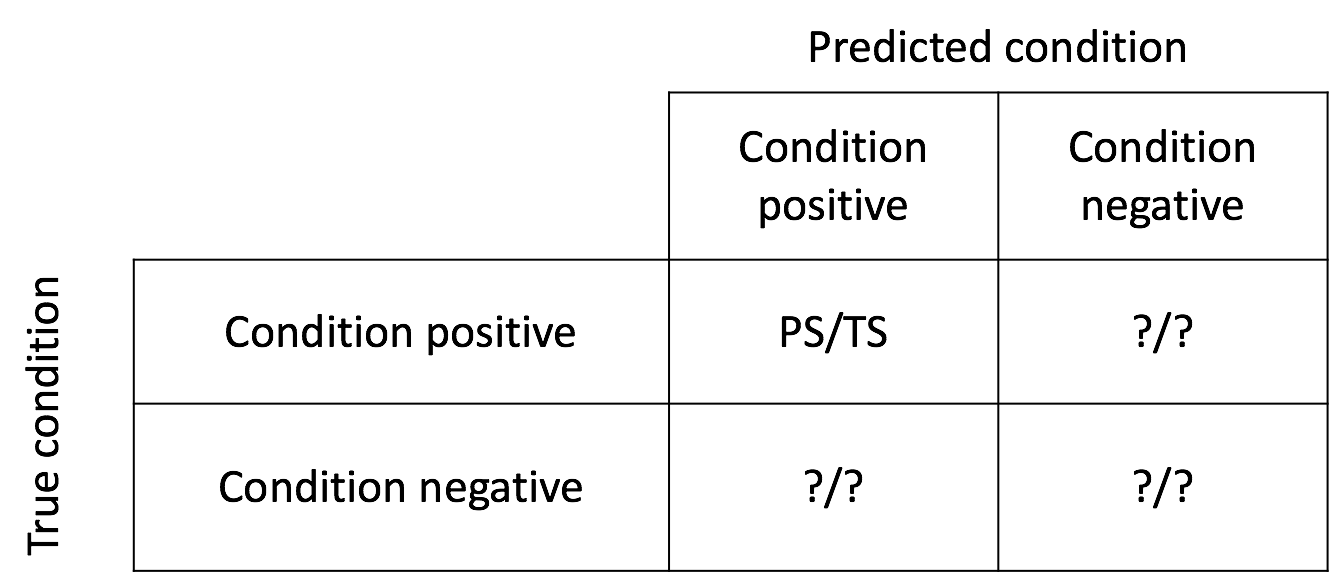

# Measuring generalization performance: confusion matrix (2)
- **Activity**: Predict spam. Given one normal email (True Normal: TN) and one spam email (True Spam: TS), Gmail can classify as spam (Predict Spam: PS) or not spam (Predict Normal: PN). Where would you put all these cases in a confusion matrix?
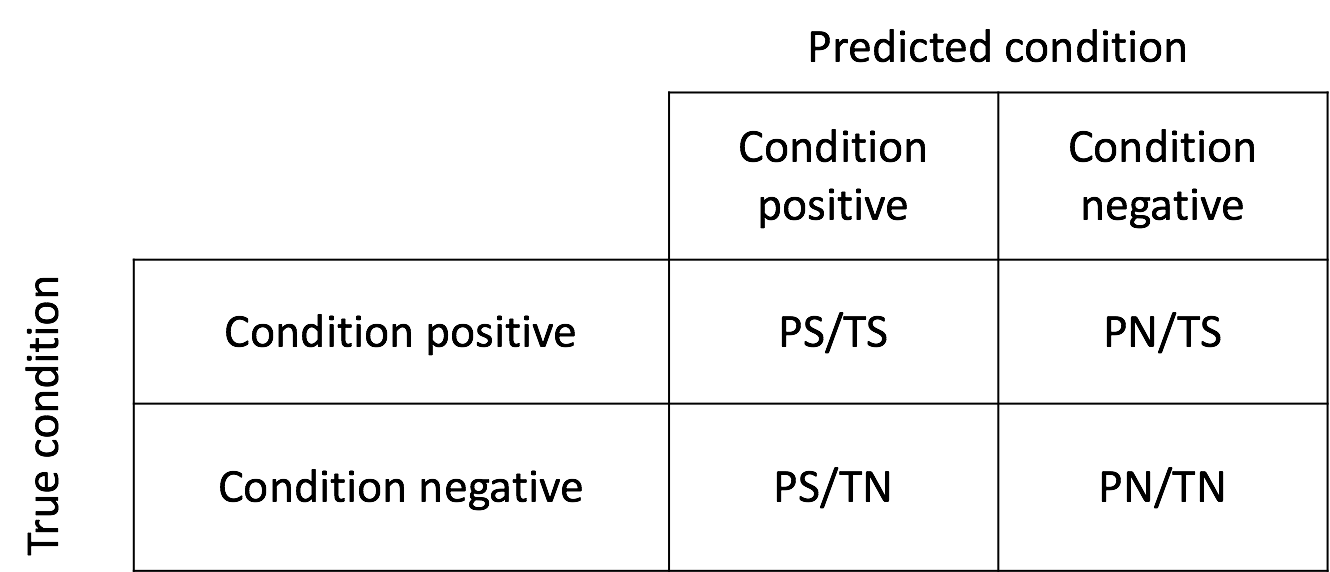

# Measuring generalization performance: confusion matrix (3)
- This matrix is called a **confusion matrix**: summary of true vs predicted cases
<center><img src="./images/unit-06/unit-06-0_ama9.png" width="80%" align="center"></center>

# Measuring generalization performance: Common statistics from confusion matrix
- **Prevalence**: (TP+FN) / everything
- **Precision**: TP / (TP + FP)
- **Sensitivity**, **Recall**, or **True positive rate**: TP / true condition positive
- **Specificity**: TN / true condition negative
- **F1**: $\frac{2*precision*recall}{precision + recall}$

# Measuring generalization performance: ROC curve
- In general, no single algorithm has the best sensitivity and specificity simultaneously.
- Some algorithms offer a range of sensitivity/specificity points.  ROC curve displays this

<center><img src="./images/unit-06/unit-06-0_ama10.png" width="100%" align="center"></center>

# Measuring generalization performance: ROC curve (2)
- We will classify as spam if classifier thinks with more than 50% probability.  

<br>
<center><img src="./images/unit-06/unit-06-0_ama11.png" width="100%" align="center"></center>

# Measuring generalization performance: ROC curve (3)
- **Less stringent, we will classify as spam if P(spam) > 0.1**

<br>
<center><img src="./images/unit-06/unit-06-0_ama12.png" width="100%" align="center"></center>

# Measuring generalization performance: ROC curve (4)
- We can put the two thresholds $\theta = 0.5$ and $\theta = 0.1$ in a plot.

<br>
<center><img src="./images/unit-06/unit-06-0_ama13.png" width="50%" align="center"></center>

# Measuring generalization performance: ROC curve  (5)
- We can do this for every threshold value and plot the result as a curve.  
<br>
<center><img src="./images/unit-06/unit-06-0_ama14.png" width="50%" align="center"></center>
<br>
<u>**Activity**</u>: can you guess the curve of a random classifier?

# Measuring generalization performance: ROC curve (6)
- We can do this for every threshold value and plot the result as follows:  

<br>
<div class="container2">
  <div class="row2">
    <div class="col-8">
      <center><img src="./images/unit-06/unit-06-0_ama15_2.png" width="50%" align="center"></center>
    </div>
  <div class="col-4">
    <br>  
    <p>A measure that combines all thresholds is the **Area Under the ROC Curve (AUC)**</p>
</div>     

# Area under the ROC curve (AUC)

- It is hard to interpret but:
    - It can be thought as how good is the model to rank the probabilities with the real labels
- The **AUC** is 1/2 if the classifier is *random* or *constant*
- **Activity: show that the AUC is in fact 1/2 for a random predictor**

# AUC for random prediction

- AP, AN, PP, PN mean actual positive, actual negative, predicted positive, and predictived negative, respectively
- There are $n$ cases in total

| .  | PP|PN |
|---|---|---|
| AP| TP|FN |
| AN| FP|TN |

- Cases are gonna randomly fall on PP and PN. 
- For a given threshold $\theta$, FP = $(1-\theta)$AN and TN=$\theta$AN, and similarly TP=$(1-\theta)$AP and FN=$\theta$AP
- FPR = $(1-\theta)$AN/($(1-\theta)$AN + $\theta$AN) = $1-\theta$
- Therefore, AUC = $\frac{1}{2}$

# AUC for constant prediction
- As we move the threshold there will be a change between all points being in PP to PN, or viceverse.
- There two points will have FPR=TPR=0 and FPR=TPR=1 respectively
- By interpolation, AUC = $\frac{1}{2}$

# The Bayesian classifier
- Many values from confusion matrix are misleading because we are not using *prevalence rates*.  

- Maximum likelihood estimators estimate the most likely classification of the data given a hypothesis (actual class) without consideration of the *prevalance rate*

- The optimal decision however is achieved by Bayes' theorem

$$p(\text{hypothesis} \mid \text{data}) = \frac{p(\text{data} \mid \text{hypothesis})\;p(\text{hypothesis})}{p(\text{data})}$$

# The Bayesian classifier (2)
- Sometimes classification performance in terms of metrics that do not consider prevalance.
- For example, a classifier for cancer (C) given positive results (R) or might be reported with:
  - Specificity: 95%
  - Sensitivity: 60%  
- But cancer prevalance is low (0.2%)
$$p(\text{C}\mid \text{R}) = \frac{p(\text{R}\mid\text{C})p(\text{C})}{p(\text{R})}$$
with
$$p(\text{R}) = p(\text{R}\mid\text{C})p(\text{C}) + p(\text{R}\mid\neg\text{C})p(\neg\text{C})$$


# Take home message
- Always keep the testing dataset in vault until the end of your analysis.  

- Use model selection to choose from models of different complexity.  

- Stick to a loss function throughout your analysis.  

- For classification problems, think carefully about the requirements of your problem.  

- Be careful about the prevalence values.